Nombre de données dans la classe 0 :  3000
Nombre de données dans la classe 1 :  2000


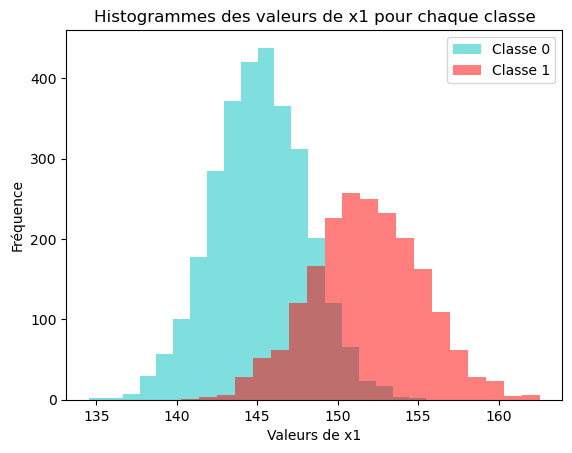

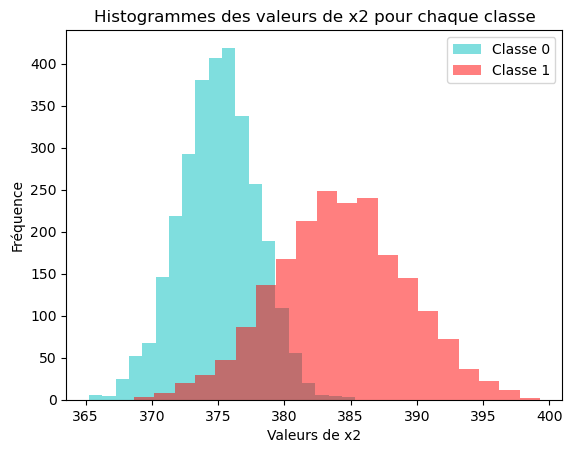

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tp8_data1_train.txt", names=["x1", "x2", "y"])
X_train = df[["x1", "x2"]].values
y_train = df["y"].values

class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

# Affichage du nombre de données dans la classe 0
print('Nombre de données dans la classe 0 : ', len(class_0))

# Affichage du nombre de données dans la classe 1
print('Nombre de données dans la classe 1 : ', len(class_1))

plt.hist(class_0["x1"], bins=20, alpha=0.5, label='Classe 0', color='c')
plt.hist(class_1["x1"], bins=20, alpha=0.5, label='Classe 1', color='r')
plt.xlabel('Valeurs de x1')
plt.ylabel('Fréquence')
plt.title('Histogrammes des valeurs de x1 pour chaque classe')
plt.legend()
plt.show()

plt.hist(class_0["x2"], bins=20, alpha=0.5, label='Classe 0', color='c')
plt.hist(class_1["x2"], bins=20, alpha=0.5, label='Classe 1', color='r')
plt.xlabel('Valeurs de x2')
plt.ylabel('Fréquence')
plt.title('Histogrammes des valeurs de x2 pour chaque classe')
plt.legend()
plt.show()

In [7]:
df

,x1,x2,y
0,152.802838,375.136582,0
1,144.525207,373.599890,0
2,149.253914,385.571464,1
3,140.363487,370.842969,0
4,150.356595,374.590383,0
...,...,...,...
4995,148.851025,387.479087,1
4996,147.285125,390.407219,1
4997,153.708136,380.856022,1
4998,143.598923,376.156155,0


In [6]:
print(class_0)
print(class_1)

              x1          x2  y
0     152.802838  375.136582  0
1     144.525207  373.599890  0
3     140.363487  370.842969  0
4     150.356595  374.590383  0
5     138.564954  365.937957  0
...          ...         ... ..
4990  145.474223  375.874519  0
4992  148.745080  382.923491  0
4993  148.975400  374.618853  0
4998  143.598923  376.156155  0
4999  144.381581  379.401757  0

[3000 rows x 3 columns]
              x1          x2  y
2     149.253914  385.571464  1
6     151.441713  389.324466  1
7     148.420155  393.733082  1
10    156.648533  387.297298  1
11    158.031006  373.153177  1
...          ...         ... ..
4991  147.124425  391.423259  1
4994  148.157416  388.409798  1
4995  148.851025  387.479087  1
4996  147.285125  390.407219  1
4997  153.708136  380.856022  1

[2000 rows x 3 columns]


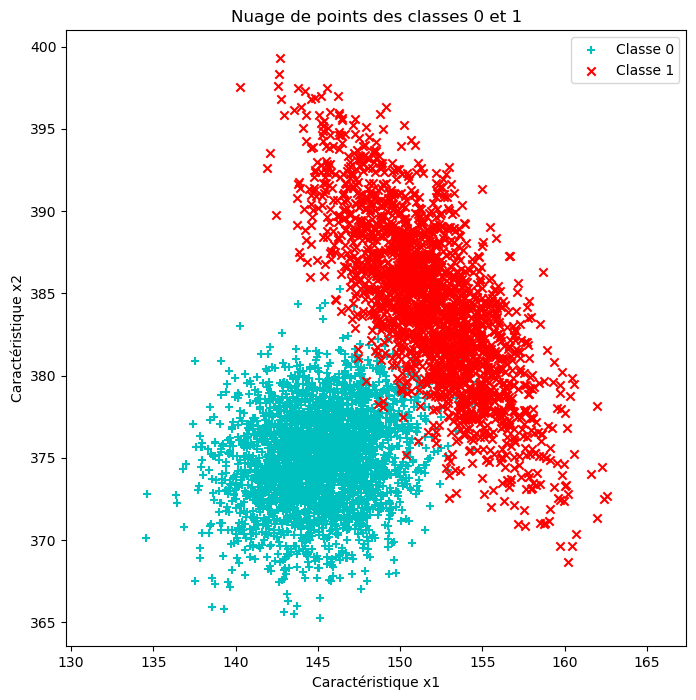

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(class_0['x1'], class_0['x2'], marker='+', color='c', label='Classe 0')
plt.scatter(class_1['x1'], class_1['x2'], marker='x', color='r', label='Classe 1')
plt.axis("equal")
plt.title('Nuage de points des classes 0 et 1')
plt.xlabel('Caractéristique x1')
plt.ylabel('Caractéristique x2')
plt.legend()
plt.show()

In [4]:
mean_class_0 = class_0[["x1", "x2"]].mean().values
mean_class_1 = class_1[["x1", "x2"]].mean().values

cov_class_0 = np.cov(class_0[["x1", "x2"]].values.T)
cov_class_1 = np.cov(class_1[["x1", "x2"]].values.T)

prior_class_0 = len(class_0)/len(y_train)
prior_class_1 = len(class_1)/len(y_train)

print("Mean Class 0:", mean_class_0)
print("Mean Class 1:", mean_class_1)
print("Covariance Class 0:\n", cov_class_0)
print("Covariance Class 1:\n", cov_class_1)
print("Prior Class 0:", prior_class_0)
print("Prior Class 1:", prior_class_1)

Mean Class 0: [145.13781193 375.01076021]
Mean Class 1: [151.81100794 384.27454977]
Covariance Class 0:
 [[8.25740993 1.70819695]
 [1.70819695 8.35057411]]
Covariance Class 1:
 [[ 11.62565778 -12.62683843]
 [-12.62683843  24.80759394]]
Prior Class 0: 0.6
Prior Class 1: 0.4


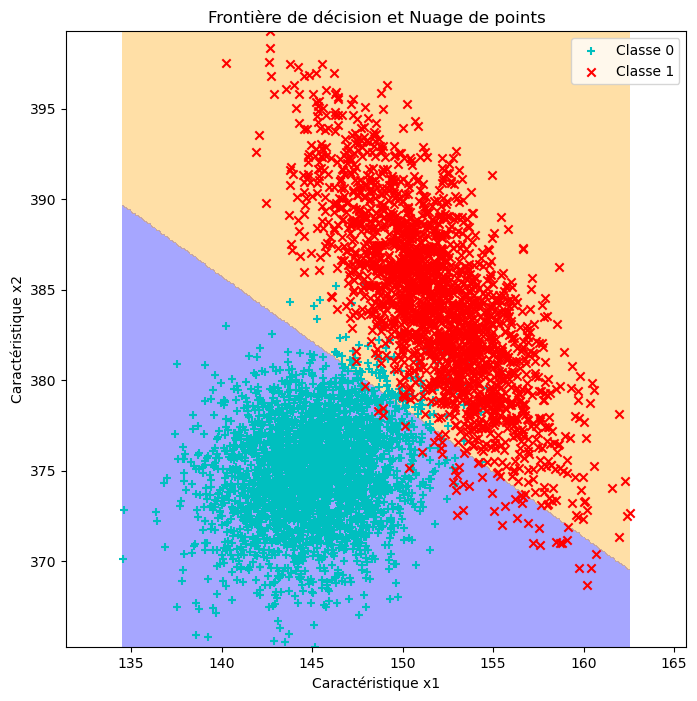

In [8]:
def prediction(x):
    dist_class_0 = np.sum((x - mean_class_0) ** 2)
    dist_class_1 = np.sum((x - mean_class_1) ** 2)
    return 0 if dist_class_0 < dist_class_1 else 1

def plot_decision(x1_min, x1_max, x2_min, x2_max, prediction, sample=300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = np.array([[prediction(np.array([x1, x2])) for x1 in x1_list] for x2 in x2_list])
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=1, colors=["blue", "orange"], alpha=0.35)

plt.figure(figsize=(8, 8))
plot_decision(df['x1'].min(), df['x1'].max(), df['x2'].min(), df['x2'].max(), prediction)
plt.scatter(class_0['x1'], class_0['x2'], marker='+', color='c', label='Classe 0')
plt.scatter(class_1['x1'], class_1['x2'], marker='x', color='r', label='Classe 1')
plt.axis("equal")
plt.title('Frontière de décision et Nuage de points')
plt.xlabel('Caractéristique x1')
plt.ylabel('Caractéristique x2')
plt.legend()
plt.show()

In [9]:
df_valid = pd.read_csv("tp8_data1_valid.txt", names=["x1", "x2", "y"])
X_valid = df_valid[["x1", "x2"]].values
y_valid = df_valid["y"].values
y_pred = [prediction(x) for x in X_valid]

# Construction de la matrice de confusion
def confusion_matrix(y_valid, y_pred):
    confusion_matrix = pd.crosstab(pd.Series(y_pred, name='Predicted'), pd.Series(y_valid, name='Actual'))
    return confusion_matrix

# Calcul du taux d'erreur
def error_rate(y_valid, y_pred):
    num_errors = sum(y_valid != y_pred)
    error_rate = num_errors / len(y_valid)
    return error_rate

# Affichage du taux d'erreur et de la matrice de confusion
conf_matrix = confusion_matrix(y_valid, y_pred)
err_rate = error_rate(y_valid, y_pred)

print("Taux d'erreur du modèle : {:.2f}%".format(err_rate * 100))
print("\nMatrice de confusion :")
print(conf_matrix)

Taux d'erreur du modèle : 3.16%

Matrice de confusion :
Actual        0    1
Predicted           
0          1446   25
1            54  975


Taux d'erreur du modèle : 1.40%

Matrice de confusion :
Actual        0    1
Predicted           
0          1480   15
1            20  985


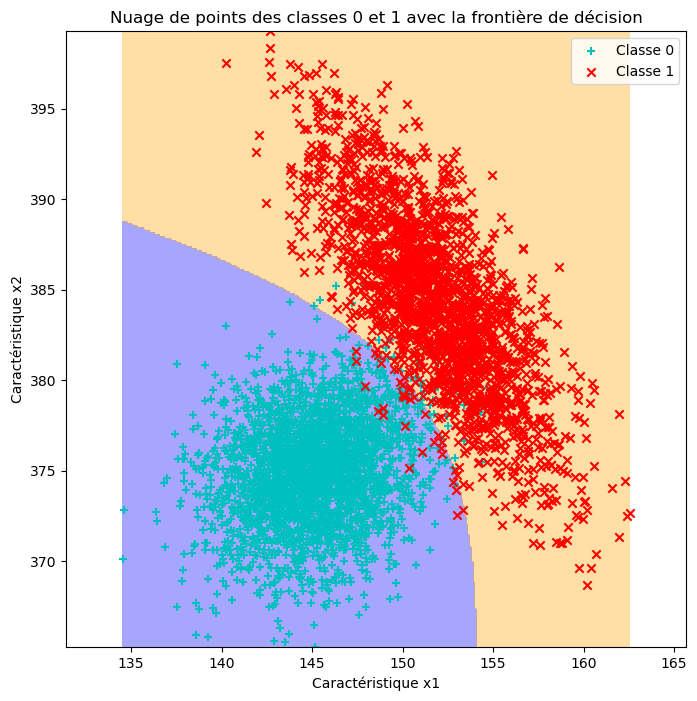

In [16]:
df = pd.read_csv("tp8_data1_train.txt", names=["x1", "x2", "y"])
X_train = df[["x1", "x2"]].values
y_train = df["y"].values

class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

# Calcul des moyennes et des matrices de covariance pour chaque classe
mean_class_0 = class_0[["x1", "x2"]].mean().values
mean_class_1 = class_1[["x1", "x2"]].mean().values

cov_matrix_class_0 = class_0[["x1", "x2"]].cov().values
cov_matrix_class_1 = class_1[["x1", "x2"]].cov().values

# Estimation des paramètres de la distance de Mahalanobis généralisée
inv_cov_matrix_class_0 = np.linalg.inv(cov_matrix_class_0)
inv_cov_matrix_class_1 = np.linalg.inv(cov_matrix_class_1)

det_cov_matrix_class_0 = np.linalg.det(cov_matrix_class_0)
det_cov_matrix_class_1 = np.linalg.det(cov_matrix_class_1)

prior_class_0 = len(class_0) / len(df)
prior_class_1 = len(class_1) / len(df)

# Définition des parties constantes avec des fonctions lambda
calc_dist_class_0 = lambda x: np.dot(np.dot((x - mean_class_0).T, inv_cov_matrix_class_0), (x - mean_class_0)) + np.log(det_cov_matrix_class_0) - 2 * np.log(prior_class_0)
calc_dist_class_1 = lambda x: np.dot(np.dot((x - mean_class_1).T, inv_cov_matrix_class_1), (x - mean_class_1)) + np.log(det_cov_matrix_class_1) - 2 * np.log(prior_class_1)

# Fonction de prédiction utilisant la distance de Mahalanobis généralisée
def prediction(x, calc_dist_class_0=calc_dist_class_0, calc_dist_class_1=calc_dist_class_1):
    dist_class_0 = calc_dist_class_0(x)
    dist_class_1 = calc_dist_class_1(x)
    return 0 if dist_class_0 < dist_class_1 else 1

# Fonction pour afficher la frontière de décision
def plot_decision(x1_min, x1_max, x2_min, x2_max, prediction, sample=300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = np.array([[prediction(np.array([x1, x2])) for x1 in x1_list] for x2 in x2_list])
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=1, colors=["blue", "orange"], alpha=0.35)

# Lecture des données de validation
df_valid = pd.read_csv("tp8_data1_valid.txt", names=["x1", "x2", "y"])
X_valid = df_valid[["x1", "x2"]].values
y_valid = df_valid["y"].values

# Prédiction sur les données de validation
y_pred = [prediction(x) for x in X_valid]

# Construction de la matrice de confusion
def confusion_matrix(y_valid, y_pred):
    confusion_matrix = pd.crosstab(pd.Series(y_pred, name='Predicted'), pd.Series(y_valid, name='Actual'))
    return confusion_matrix

# Calcul du taux d'erreur
def error_rate(y_valid, y_pred):
    num_errors = sum(y_valid != y_pred)
    error_rate = num_errors / len(y_valid)
    return error_rate

# Affichage du taux d'erreur et de la matrice de confusion
conf_matrix = confusion_matrix(y_valid, y_pred)
err_rate = error_rate(y_valid, y_pred)

print("Taux d'erreur du modèle : {:.2f}%".format(err_rate * 100))
print("\nMatrice de confusion :")
print(conf_matrix)

# Affichage de la frontière de décision et des nuages de points sur un même graphique
plt.figure(figsize=(8, 8))
plot_decision(df['x1'].min(), df['x1'].max(), df['x2'].min(), df['x2'].max(), prediction)
plt.scatter(class_0['x1'], class_0['x2'], marker='+', color='c', label='Classe 0')
plt.scatter(class_1['x1'], class_1['x2'], marker='x', color='r', label='Classe 1')
plt.axis("equal")
plt.title('Nuage de points des classes 0 et 1 avec la frontière de décision')
plt.xlabel('Caractéristique x1')
plt.ylabel('Caractéristique x2')
plt.legend()
plt.show()

Nombre de données dans la classe 0 :  5000
Nombre de données dans la classe 1 :  95000


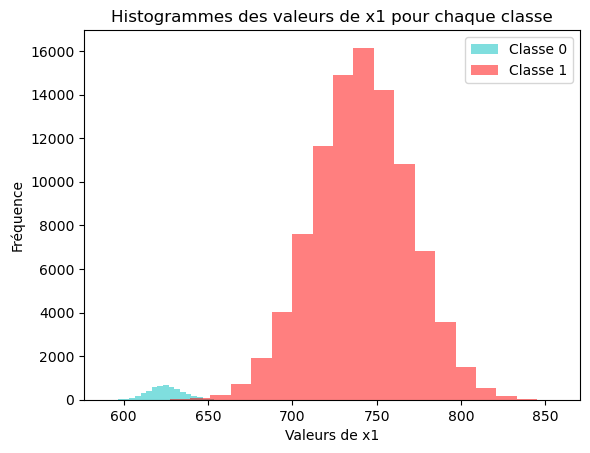

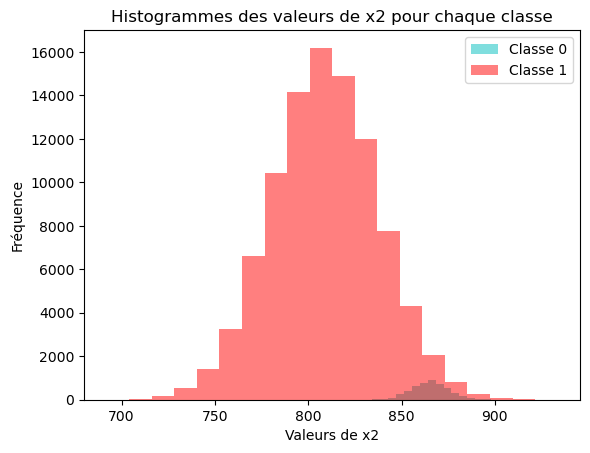

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tp8_data2_train.txt", names=["x1", "x2", "y"])
X_train = df[["x1", "x2"]].values
y_train = df["y"].values

class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

# Affichage du nombre de données dans la classe 0
print('Nombre de données dans la classe 0 : ', len(class_0))

# Affichage du nombre de données dans la classe 1
print('Nombre de données dans la classe 1 : ', len(class_1))

plt.hist(class_0["x1"], bins=20, alpha=0.5, label='Classe 0', color='c')
plt.hist(class_1["x1"], bins=20, alpha=0.5, label='Classe 1', color='r')
plt.xlabel('Valeurs de x1')
plt.ylabel('Fréquence')
plt.title('Histogrammes des valeurs de x1 pour chaque classe')
plt.legend()
plt.show()

plt.hist(class_0["x2"], bins=20, alpha=0.5, label='Classe 0', color='c')
plt.hist(class_1["x2"], bins=20, alpha=0.5, label='Classe 1', color='r')
plt.xlabel('Valeurs de x2')
plt.ylabel('Fréquence')
plt.title('Histogrammes des valeurs de x2 pour chaque classe')
plt.legend()
plt.show()

In [11]:
print(class_0)
print(class_1)

               x1          x2  y
7      617.937355  856.627012  0
49     622.253208  881.971914  0
58     634.086580  889.537612  0
65     629.345332  865.542844  0
92     625.147148  866.276842  0
...           ...         ... ..
99976  624.705627  875.113021  0
99984  629.033349  872.097051  0
99987  604.640897  869.006379  0
99992  624.103163  862.503877  0
99993  622.754717  862.258262  0

[5000 rows x 3 columns]
               x1          x2  y
0      795.307562  812.356555  1
1      738.167652  839.359049  1
2      763.913109  778.498537  1
3      807.669126  861.835705  1
4      703.488147  825.392299  1
...           ...         ... ..
99995  753.936798  761.827630  1
99996  781.479261  813.410460  1
99997  724.906187  797.536674  1
99998  728.496620  791.353408  1
99999  740.934299  817.255437  1

[95000 rows x 3 columns]


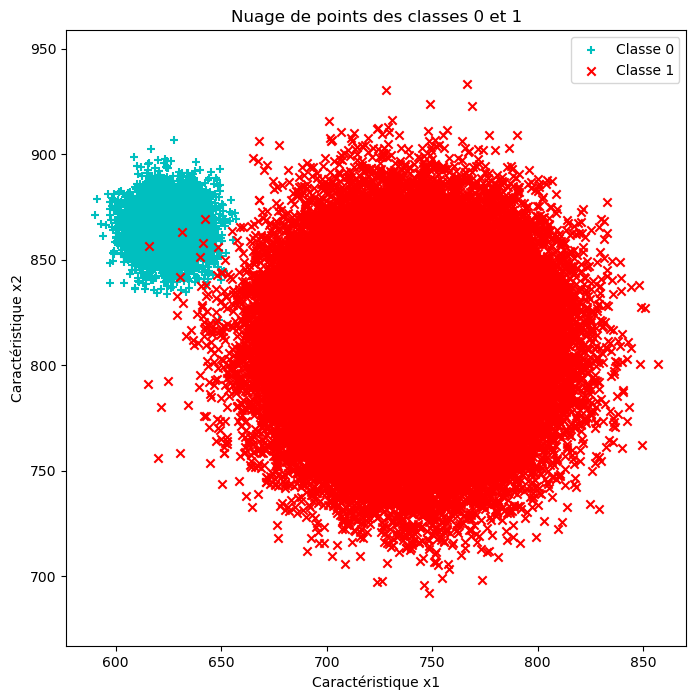

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(class_0['x1'], class_0['x2'], marker='+', color='c', label='Classe 0')
plt.scatter(class_1['x1'], class_1['x2'], marker='x', color='r', label='Classe 1')
plt.axis("equal")
plt.title('Nuage de points des classes 0 et 1')
plt.xlabel('Caractéristique x1')
plt.ylabel('Caractéristique x2')
plt.legend()
plt.show()

In [13]:
mean_class_0 = class_0[["x1", "x2"]].mean().values
mean_class_1 = class_1[["x1", "x2"]].mean().values

cov_class_0 = np.cov(class_0[["x1", "x2"]].values.T)
cov_class_1 = np.cov(class_1[["x1", "x2"]].values.T)

prior_class_0 = len(class_0)/len(y_train)
prior_class_1 = len(class_1)/len(y_train)

print("Mean Class 0:", mean_class_0)
print("Mean Class 1:", mean_class_1)
print("Covariance Class 0:\n", cov_class_0)
print("Covariance Class 1:\n", cov_class_1)
print("Prior Class 0:", prior_class_0)
print("Prior Class 1:", prior_class_1)

Mean Class 0: [624.77106271 865.27736698]
Mean Class 1: [740.9100593  808.98835583]
Covariance Class 0:
 [[100.85259056  -0.55863563]
 [ -0.55863563 101.06082231]]
Covariance Class 1:
 [[8.03368579e+02 3.19276061e-01]
 [3.19276061e-01 8.02965824e+02]]
Prior Class 0: 0.05
Prior Class 1: 0.95


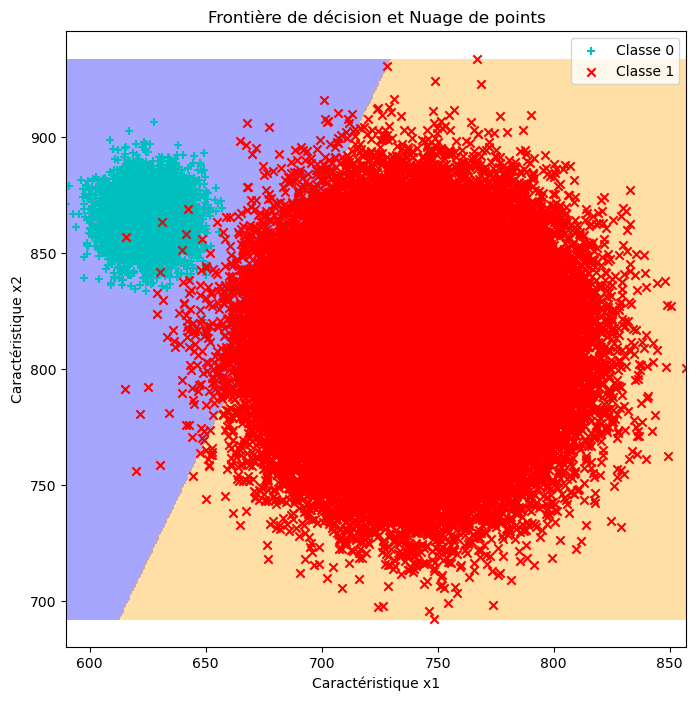

In [14]:
def prediction(x):
    dist_class_0 = np.sum((x - mean_class_0) ** 2)
    dist_class_1 = np.sum((x - mean_class_1) ** 2)
    return 0 if dist_class_0 < dist_class_1 else 1

def plot_decision(x1_min, x1_max, x2_min, x2_max, prediction, sample=300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = np.array([[prediction(np.array([x1, x2])) for x1 in x1_list] for x2 in x2_list])
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=1, colors=["blue", "orange"], alpha=0.35)

plt.figure(figsize=(8, 8))
plot_decision(df['x1'].min(), df['x1'].max(), df['x2'].min(), df['x2'].max(), prediction)
plt.scatter(class_0['x1'], class_0['x2'], marker='+', color='c', label='Classe 0')
plt.scatter(class_1['x1'], class_1['x2'], marker='x', color='r', label='Classe 1')
plt.axis("equal")
plt.title('Frontière de décision et Nuage de points')
plt.xlabel('Caractéristique x1')
plt.ylabel('Caractéristique x2')
plt.legend()
plt.show()

In [15]:
df_valid = pd.read_csv("tp8_data2_valid.txt", names=["x1", "x2", "y"])
X_valid = df_valid[["x1", "x2"]].values
y_valid = df_valid["y"].values
y_pred = [prediction(x) for x in X_valid]

# Construction de la matrice de confusion
def confusion_matrix(y_valid, y_pred):
    confusion_matrix = pd.crosstab(pd.Series(y_pred, name='Predicted'), pd.Series(y_valid, name='Actual'))
    return confusion_matrix

# Calcul du taux d'erreur
def error_rate(y_valid, y_pred):
    num_errors = sum(y_valid != y_pred)
    error_rate = num_errors / len(y_valid)
    return error_rate

# Affichage du taux d'erreur et de la matrice de confusion
conf_matrix = confusion_matrix(y_valid, y_pred)
err_rate = error_rate(y_valid, y_pred)

print("Taux d'erreur du modèle : {:.2f}%".format(err_rate * 100))
print("\nMatrice de confusion :")
print(conf_matrix)

Taux d'erreur du modèle : 0.99%

Matrice de confusion :
Actual        0      1
Predicted             
0          2500    494
1             0  47006


Taux d'erreur du modèle : 0.01%

Matrice de confusion :
Actual        0      1
Predicted             
0          2497      4
1             3  47496


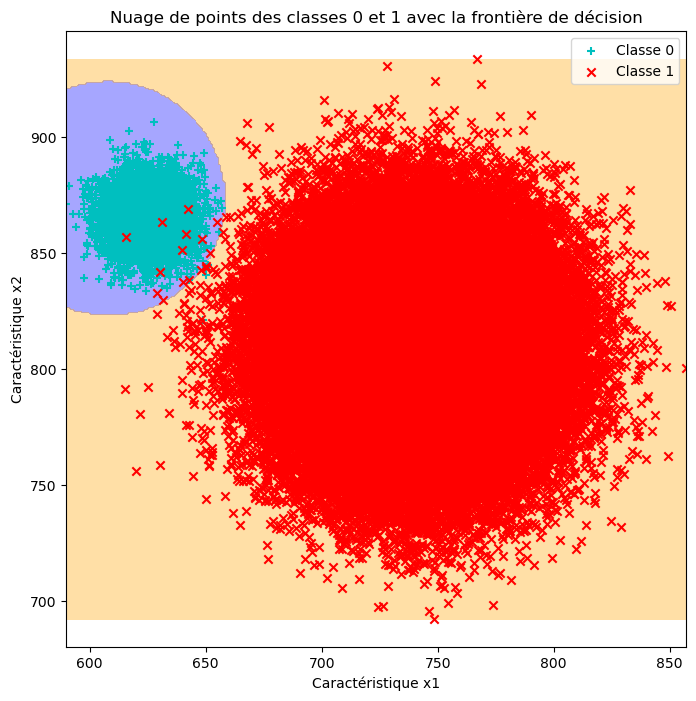

In [17]:
df = pd.read_csv("tp8_data2_train.txt", names=["x1", "x2", "y"])
X_train = df[["x1", "x2"]].values
y_train = df["y"].values

class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

# Calcul des moyennes et des matrices de covariance pour chaque classe
mean_class_0 = class_0[["x1", "x2"]].mean().values
mean_class_1 = class_1[["x1", "x2"]].mean().values

cov_matrix_class_0 = class_0[["x1", "x2"]].cov().values
cov_matrix_class_1 = class_1[["x1", "x2"]].cov().values

# Estimation des paramètres de la distance de Mahalanobis généralisée
inv_cov_matrix_class_0 = np.linalg.inv(cov_matrix_class_0)
inv_cov_matrix_class_1 = np.linalg.inv(cov_matrix_class_1)

det_cov_matrix_class_0 = np.linalg.det(cov_matrix_class_0)
det_cov_matrix_class_1 = np.linalg.det(cov_matrix_class_1)

prior_class_0 = len(class_0) / len(df)
prior_class_1 = len(class_1) / len(df)

# Définition des parties constantes avec des fonctions lambda
calc_dist_class_0 = lambda x: np.dot(np.dot((x - mean_class_0).T, inv_cov_matrix_class_0), (x - mean_class_0)) + np.log(det_cov_matrix_class_0) - 2 * np.log(prior_class_0)
calc_dist_class_1 = lambda x: np.dot(np.dot((x - mean_class_1).T, inv_cov_matrix_class_1), (x - mean_class_1)) + np.log(det_cov_matrix_class_1) - 2 * np.log(prior_class_1)

# Fonction de prédiction utilisant la distance de Mahalanobis généralisée
def prediction(x, calc_dist_class_0=calc_dist_class_0, calc_dist_class_1=calc_dist_class_1):
    dist_class_0 = calc_dist_class_0(x)
    dist_class_1 = calc_dist_class_1(x)
    return 0 if dist_class_0 < dist_class_1 else 1

# Fonction pour afficher la frontière de décision
def plot_decision(x1_min, x1_max, x2_min, x2_max, prediction, sample=300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = np.array([[prediction(np.array([x1, x2])) for x1 in x1_list] for x2 in x2_list])
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=1, colors=["blue", "orange"], alpha=0.35)

# Lecture des données de validation
df_valid = pd.read_csv("tp8_data2_valid.txt", names=["x1", "x2", "y"])
X_valid = df_valid[["x1", "x2"]].values
y_valid = df_valid["y"].values

# Prédiction sur les données de validation
y_pred = [prediction(x) for x in X_valid]

# Construction de la matrice de confusion
def confusion_matrix(y_valid, y_pred):
    confusion_matrix = pd.crosstab(pd.Series(y_pred, name='Predicted'), pd.Series(y_valid, name='Actual'))
    return confusion_matrix

# Calcul du taux d'erreur
def error_rate(y_valid, y_pred):
    num_errors = sum(y_valid != y_pred)
    error_rate = num_errors / len(y_valid)
    return error_rate

# Affichage du taux d'erreur et de la matrice de confusion
conf_matrix = confusion_matrix(y_valid, y_pred)
err_rate = error_rate(y_valid, y_pred)

print("Taux d'erreur du modèle : {:.2f}%".format(err_rate * 100))
print("\nMatrice de confusion :")
print(conf_matrix)

# Affichage de la frontière de décision et des nuages de points sur un même graphique
plt.figure(figsize=(8, 8))
plot_decision(df['x1'].min(), df['x1'].max(), df['x2'].min(), df['x2'].max(), prediction)
plt.scatter(class_0['x1'], class_0['x2'], marker='+', color='c', label='Classe 0')
plt.scatter(class_1['x1'], class_1['x2'], marker='x', color='r', label='Classe 1')
plt.axis("equal")
plt.title('Nuage de points des classes 0 et 1 avec la frontière de décision')
plt.xlabel('Caractéristique x1')
plt.ylabel('Caractéristique x2')
plt.legend()
plt.show()